# Задание 2

Задание выполнено на Python 3.8

Импорт пакетов для обработки и визуализации данных

In [23]:
import pandas as pd
import plotly.express as px

Для удобства просмотра информации задаем параметр при просмотре таблиц - до 6 столбцов:

In [24]:
pd.set_option('display.max_columns',6)

Загружаем данные из файла формата csv в таблицу:

In [25]:
df = pd.read_csv(r'https://raw.githubusercontent.com/xssokolova/profi/master/countries%20of%20the%20world.csv')

## Предварительный анализ

Таблица состоит из 227 строк и 20 колонок, используется тип данных: float64 - 1 переменная, int64 - 2 переменные, object - 17 переменных.

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

  Часть столбцов содержит нулевые значения от 0,4% до 9.7% от всей информации в столбце.

In [27]:
for col in df.columns:
    print(col, round((df[col].isnull().sum()/len(df[col])*100), 1))

Country 0.0
Region 0.0
Population 0.0
Area (sq. mi.) 0.0
Pop. Density (per sq. mi.) 0.0
Coastline (coast/area ratio) 0.0
Net migration 1.3
Infant mortality (per 1000 births) 1.3
GDP ($ per capita) 0.4
Literacy (%) 7.9
Phones (per 1000) 1.8
Arable (%) 0.9
Crops (%) 0.9
Other (%) 0.9
Climate 9.7
Birthrate 1.3
Deathrate 1.8
Agriculture 6.6
Industry 7.0
Service 6.6


Создаем новую таблицу,в которой останутся только те колонки, которые нужны для выполнения задания.

In [28]:
data = df.filter(['Country','Region','Population', 'Area (sq. mi.)', 'Net migration', 'Literacy (%)'], axis=1)

Переименуем названия столбцов, чтобы их было удобно использовать для обращения к ним через функции.

In [29]:
data.columns=['country', 'region', 'population', 'area', 'migration', 'literacy']

Поменяем тип данных:

In [30]:
data.country = data.country.astype('category')
data.region = data.region.astype('category')
data.migration = data.migration.str.replace(",",".").astype(float)
data.literacy = data.literacy.str.replace(",",".").astype(float)

Проведем предварительный анализ таблицы "data" после внесенных нами изменений:

In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     227 non-null    category
 1   region      227 non-null    category
 2   population  227 non-null    int64   
 3   area        227 non-null    int64   
 4   migration   224 non-null    float64 
 5   literacy    209 non-null    float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 14.9 KB
None


Тип данных: category(2), float64(2), int64(2).

В колонках "migration" и "literacy" есть нулевые значения (1.3% в migration и 7.9% в "literacy").

In [32]:
for col in data.columns:
    print(col, round((data[col].isnull().sum()/len(data[col])*100), 1))

country 0.0
region 0.0
population 0.0
area 0.0
migration 1.3
literacy 7.9


Посмотрим основные статистические показатели по колонкам, содержащим числовые данные:

In [33]:
print(data.describe())

         population          area   migration    literacy
count  2.270000e+02  2.270000e+02  224.000000  209.000000
mean   2.874028e+07  5.982270e+05    0.038125   82.838278
std    1.178913e+08  1.790282e+06    4.889269   19.722173
min    7.026000e+03  2.000000e+00  -20.990000   17.600000
25%    4.376240e+05  4.647500e+03   -0.927500   70.600000
50%    4.786994e+06  8.660000e+04    0.000000   92.500000
75%    1.749777e+07  4.418110e+05    0.997500   98.000000
max    1.313974e+09  1.707520e+07   23.060000  100.000000


Аномалий в данных не выявлено: в колонках "population" и "area" все показатели положительные, в колонке "migration" есть как положительные, так и отрицательные значения, что явлется нормой для этого показателя, в колонке "literacy" шкала измерения %, судя по минимальному и максимальному значениям, данные находятся в пределах от 0 до 100 %.

Посмотрим строки, содержащие NaN значения:

In [34]:
data_na = data[data.isna().any(axis=1)]
print (data_na)

                   country                               region  population  \
25   Bosnia & Herzegovina   EASTERN EUROPE                          4498976   
47           Cook Islands   OCEANIA                                   21388   
66          Faroe Islands   WESTERN EUROPE                            47246   
74             Gaza Strip   NEAR EAST                               1428757   
78              Gibraltar   WESTERN EUROPE                            27928   
80              Greenland   NORTHERN AMERICA                          56361   
85               Guernsey   WESTERN EUROPE                            65409   
99            Isle of Man   WESTERN EUROPE                            75441   
104                Jersey   WESTERN EUROPE                            91084   
108              Kiribati   OCEANIA                                  105432   
123             Macedonia   EASTERN EUROPE                          2050554   
134               Mayotte   SUB-SAHARAN AFRICA      

Не будем исключать эти строки из таблицы, так как они содержат необходимую информацию для ответа на вопрос о медианной площади  стран океании и понадобятся для визуализации данных о численности населения в странах. Но обратим внимание на то, что надо будет исключить NaN  при расчете уровня грамотности и миграции.

В столбце "region" в 220 строке был замечен регион "            LATIN AMER. & CARIB", в котором присутствуют лишние пробелы, удалим возможные лишние пробелы в начале и в конце строки в столбцах "country" и "region":

In [35]:
data['country'] = data['country'].str.strip()
data['region'] = data['region'].str.strip()

## 1. Посчитать медианное значение площади стран Океании.

In [36]:
# группируем страны океании в отдельную таблицу
data_oceania = data.loc[data['region'] == 'OCEANIA']

# считаем медианное значения площади стран океании
oceania_area_median = data_oceania.loc[:,"area"].median() 

# выводим результат
print("Median of Oceania area is", oceania_area_median, "sq. mi") 

Median of Oceania area is 811.0 sq. mi


## 2. Определить 10 стран с наименьшим уровнем грамотности.

In [37]:
# выбираем нужные столбцы
data_literacy = data.filter(['country', 'literacy'], axis=1) 

# исключаем строки, содержащие NaN значения
data_literacy = data_literacy.dropna(subset=['literacy'])

# сортируем значения в порядке возрастания
data_literacy = data_literacy.sort_values('literacy')

# выбираем первые 10 строк
data_literacy = data_literacy[:10]

# выводим 10 стран с наименьшим уровнем грамотности
print('10 countries with low literacy level:')
print(data_literacy) # 

10 countries with low literacy level:
          country  literacy
151         Niger      17.6
31   Burkina Faso      26.6
183  Sierra Leone      31.4
86         Guinea      35.9
0     Afghanistan      36.0
188       Somalia      37.8
73    Gambia, The      40.1
180       Senegal      40.2
97           Iraq      40.4
21          Benin      40.9


## 3. Построить график суммарной численности населения в разбивке по регионам.

Наибольшая численность населения в Азии, наименьшая в странах Балтики.

In [38]:
# выбираем нужные столбцы
data_pr = data.filter(['region', 'population'], axis=1) 

# группируем страны по регионам и считаем численность населения в каждом регионе (сумма по странам)
data_pr = data_pr.groupby('region', as_index=False)[['population']].sum()

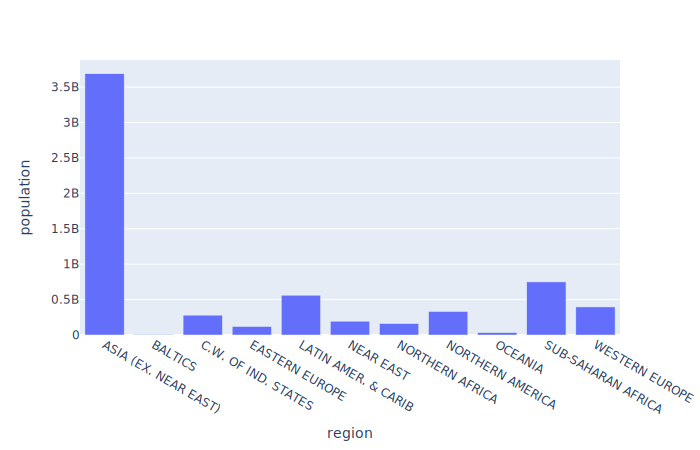

In [42]:
fig = px.bar(data_pr, x='region', y='population')
# Производим рендер графика в статическое изображение для того, чтобы он беспроблемно отображался в сети
fig.show('svg')

## 4. На основании данных, ответить на вопрос, в каком регионе наблюдается наибольший миграционный отток населения.

In [40]:
# выбираем нужные столбцы
data_mr= data.filter(['region', 'population', 'migration'], axis=1) 

# исключаем строки, содержащие NaN значения
data_mr = data_mr.dropna(subset=['migration']) 

# cчитаем (имигранты-эмигранты) страны = (численность населения страны* (коэф.миграционного прироста страны))/1000
data_mr['delta'] = (data_mr.population*data_mr.migration)/1000 

# группируем данные по регионам, считаем суммарные значения численности населения региона 
# и количество (имигранты-эмигранты) региона
data_mr = data_mr.groupby('region', as_index=False)[['population', 'delta']].sum()

# считаем коэф. миграционного прироста по регионам = 
# = (количество (имигранты-эмигранты) региона / суммарные значения численности населения региона)*1000
data_mr['migration_reg'] = (data_mr.delta / data_mr.population)*1000

# создаем таблицу из 1-й строки, содержащей информацию по региону, 
# количеству (имигранты-эмигранты) региона,коэф. миграционного прироста по региону с наибольшим миграционным оттоком населения
data_mr = data_mr[['region', 'delta', 'migration_reg']][data_mr.migration_reg == data_mr.migration_reg.min()]

# вывод ответа на вопрос
print('The highest emigration rate is in', data_mr.at[1,'region'], 'region.')
print('It\'s Net migration rate is', round(data_mr.at[1,'migration_reg'],2))

The highest emigration rate is in BALTICS region.
It's Net migration rate is -1.64
